In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns


data_frame = pd.read_csv("data.csv")
data_frame = data_frame.drop("Unnamed: 0", axis="columns")
data_frame.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


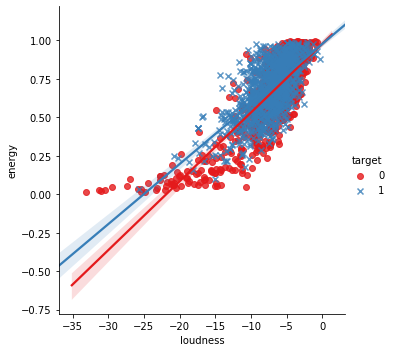

In [3]:
# We will try regression betweeen two columns by correalation maps.

sns.lmplot(x='loudness',y='energy',hue='target',data=data_frame,markers=["o", "x"], palette="Set1")


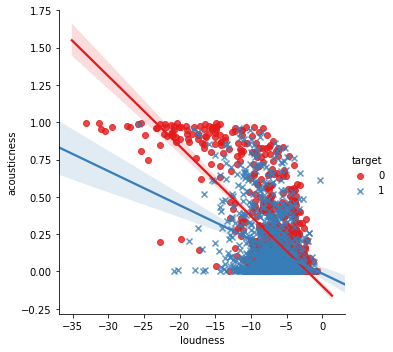

In [4]:

sns.lmplot(x='loudness',y='acousticness',hue='target',data=data_frame,markers=["o", "x"], palette="Set1")

#If correalation is higher, we can get better results in linear regression as seen.

In [5]:
x = data_frame.iloc[:,:13]
y = data_frame[['target']]


from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

from sklearn.metrics import r2_score
r_result=r2_score(y_test,y_pred)
#our R-Squared result
print("R-Squared result is :", r_result)

R-Squared result is : 0.1033464593460246


In [6]:
#R-Squared Result is bad so we will apply backward elimination
import statsmodels.regression.linear_model as sm
x = np.append(arr = np.ones((2017, 1)).astype(int),  
              values = x, axis = 1) 
x_opt = x[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     23.37
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           6.29e-53
Time:                        22:10:14   Log-Likelihood:                -1321.4
No. Observations:                2017   AIC:                             2671.
Df Residuals:                    2003   BIC:                             2749.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3135      0.206     -1.522      0.128      -0.717       0.090
x1            -0.3253      0.055     -5.916      0.000      -0.433      -0.217
x2             0.4153      0.078      5.330      0.000       0.262       0.568
x3          5.624e-07   1.38e-07      4.079      0.000    2.92e-07    8.33e-07
x4             0.0903      0.093      0.974      0.330      -0.092       0.272
x5             0.2676      0.044      6.047      0.000       0.181       0.354
x6             0.0010      0.003      0.334      0.739      -0.005       0.007
x7             0.0982      0.070      1.400      0.162      -0.039       0.236
x8            -0.0233      0.005     -4.806      0.000      -0.033      -0.014
x9            -0.0348      0.022     -1.584      0.113      -0.078       0.008
x10            0.8165      0.121      6.742      0.000       0.579       1.054
x11            0.0008      0.000      1.946      0.052   -6.21e-06       0.002
x12           -0.0086      0.042     -0.205      0.838      -0.091       0.074
x13            0.1648      0.051      3.239      0.001       0.065       0.265
==============================================================================
Omnibus:                    12674.309   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.366
Skew:                           0.068   Prob(JB):                     6.22e-43
Kurtosis:                       1.485   Cond. No.                     5.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#we eliminate 12
import statsmodels.regression.linear_model as sm
x = np.append(arr = np.ones((2017, 1)).astype(int),  
              values = x, axis = 1) 
x_opt = x[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,13]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     26.13
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.67e-51
Time:                        22:10:20   Log-Likelihood:                -1328.7
No. Observations:                2017   AIC:                             2681.
Df Residuals:                    2005   BIC:                             2749.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1255      0.096     -1.314      0.189      -0.313       0.062
x1            -0.1255      0.096     -1.314      0.189      -0.313       0.062
x2            -0.3060      0.054     -5.615      0.000      -0.413      -0.199
x3             0.5049      0.069      7.368      0.000       0.371       0.639
x4          5.146e-07   1.38e-07      3.736      0.000    2.44e-07    7.85e-07
x5             0.1907      0.088      2.162      0.031       0.018       0.364
x6             0.2498      0.044      5.706      0.000       0.164       0.336
x7             0.0012      0.003      0.421      0.674      -0.005       0.007
x8             0.0775      0.070      1.106      0.269      -0.060       0.215
x9            -0.0248      0.005     -5.151      0.000      -0.034      -0.015
x10           -0.0375      0.022     -1.703      0.089      -0.081       0.006
x11            0.8245      0.120      6.862      0.000       0.589       1.060
x12           -0.0097      0.042     -0.230      0.818      -0.092       0.073
==============================================================================
Omnibus:                    12357.180   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.583
Skew:                           0.062   Prob(JB):                     2.05e-43
Kurtosis:                       1.476   Cond. No.                     1.24e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.8e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
#we eliminate 7
import statsmodels.regression.linear_model as sm
x = np.append(arr = np.ones((2017, 1)).astype(int),  
              values = x, axis = 1) 
x_opt = x[:, [0, 1, 2, 3, 4, 5,6,8,9,10,11,13]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     24.38
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           5.30e-40
Time:                        22:10:22   Log-Likelihood:                -1359.2
No. Observations:                2017   AIC:                             2738.
Df Residuals:                    2007   BIC:                             2794.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1858      0.041     -4.562      0.000      -0.266      -0.106
x1            -0.1858      0.041     -4.562      0.000      -0.266      -0.106
x2            -0.1858      0.041     -4.562      0.000      -0.266      -0.106
x3            -0.2974      0.055     -5.389      0.000      -0.406      -0.189
x4             0.5722      0.069      8.249      0.000       0.436       0.708
x5          6.307e-07   1.36e-07      4.625      0.000    3.63e-07    8.98e-07
x6             0.2994      0.087      3.435      0.001       0.128       0.470
x7             0.0008      0.003      0.268      0.789      -0.005       0.007
x8             0.1369      0.071      1.932      0.053      -0.002       0.276
x9            -0.0352      0.005     -7.689      0.000      -0.044      -0.026
x10           -0.0433      0.022     -1.936      0.053      -0.087       0.001
x11            0.0013      0.000      3.046      0.002       0.000       0.002
==============================================================================
Omnibus:                    10126.947   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.027
Skew:                           0.042   Prob(JB):                     3.72e-49
Kurtosis:                       1.373   Cond. No.                     2.62e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
#we eliminate 10
import statsmodels.regression.linear_model as sm
x = np.append(arr = np.ones((2017, 1)).astype(int),  
              values = x, axis = 1) 
x_opt = x[:, [0, 1, 2, 3, 4, 5,6,8,9,11,13]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     39.57
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.26e-52
Time:                        22:10:24   Log-Likelihood:                -1333.5
No. Observations:                2017   AIC:                             2683.
Df Residuals:                    2009   BIC:                             2728.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0272      0.014     -1.897      0.058      -0.055       0.001
x1            -0.0272      0.014     -1.897      0.058      -0.055       0.001
x2            -0.0272      0.014     -1.897      0.058      -0.055       0.001
x3            -0.0272      0.014     -1.897      0.058      -0.055       0.001
x4            -0.3574      0.050     -7.193      0.000      -0.455      -0.260
x5             0.4765      0.067      7.115      0.000       0.345       0.608
x6          5.485e-07   1.37e-07      3.997      0.000    2.79e-07    8.18e-07
x7             0.2755      0.043      6.447      0.000       0.192       0.359
x8             0.0025      0.003      0.860      0.390      -0.003       0.008
x9            -0.0172      0.004     -4.711      0.000      -0.024      -0.010
x10            0.8631      0.119      7.254      0.000       0.630       1.096
==============================================================================
Omnibus:                    11872.818   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.467
Skew:                           0.075   Prob(JB):                     1.79e-44
Kurtosis:                       1.459   Cond. No.                     1.58e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.42e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
d1 = data_frame.iloc[:,:7]

d2 = data_frame.iloc[:,8:10]

d3 = data_frame.iloc[:,10:13]

d1_d2 = pd.concat([d1,d2],axis=1)

d_last = pd.concat([d1_d2,d3],axis=1)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(d_last,y,test_size=0.33, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

from sklearn.metrics import r2_score
r_result=r2_score(y_test,y_pred)
print("R-Squared result is :", r_result)
#our result worse than first result. So mlr is not successfull for this dataset. 

R-Squared result is : 0.09303694128265727
